<a href="https://colab.research.google.com/github/Kavia-M/Deep-Learning/blob/main/Road_Traffic_Sign_Recognition_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import pickle
import matplotlib.pyplot as plt
from math import sqrt, ceil
from timeit import default_timer as timer

from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, AvgPool2D, BatchNormalization, MaxPooling2D, AveragePooling2D, Reshape
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import LearningRateScheduler

In [ ]:
from keras import regularizers
from keras.regularizers import l2,l1

## Importing dataset

In [ ]:
import io
with open('/content/drive/MyDrive/CNN datasets/data0.pickle', 'rb') as f:
    data = pickle.load(f, encoding='latin1')


In [ ]:
with open('/content/drive/MyDrive/CNN datasets/labels.pickle', 'rb') as fl:
    data_labels = pickle.load(fl, encoding='latin1')

In [ ]:
for i, j in data.items():
    if i == 'labels':
        print(i + ':', len(j))
    else: 
        print(i + ':', j.shape)

x_test: (12630, 3, 32, 32)
y_validation: (4410,)
x_validation: (4410, 3, 32, 32)
labels: 43
x_train: (86989, 3, 32, 32)
y_test: (12630,)
y_train: (86989,)


In [ ]:
print(type(data['y_train']))

<class 'numpy.ndarray'>


# Preprocessing

#### converting the data tensors into channel last form

In [ ]:
data['x_train'] = data['x_train'].transpose(0, 2, 3, 1)
data['x_validation'] = data['x_validation'].transpose(0, 2, 3, 1)
data['x_test'] = data['x_test'].transpose(0, 2, 3, 1)

In [ ]:
train_images = data['x_train']
test_images = data['x_test']
train_labels = data['y_train']
test_labels = data['y_test']
validation_images = data['x_validation']
validation_labels = data['y_validation']

In [ ]:
classes = np.unique(train_labels)   #use this to find the diffent classes in train data so that we can use same number of neurons in softmax layer
nClasses = len(classes)

print('Total number of outputs : ', nClasses)
print('Output classes : ', classes)


Total number of outputs :  43
Output classes :  [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42]


The label values are 

In [ ]:
print(data_labels)

['Speed limit (20km/h)', 'Speed limit (30km/h)', 'Speed limit (50km/h)', 'Speed limit (60km/h)', 'Speed limit (70km/h)', 'Speed limit (80km/h)', 'End of speed limit (80km/h)', 'Speed limit (100km/h)', 'Speed limit (120km/h)', 'No passing', 'No passing for vehicles over 3.5 metric tons', 'Right-of-way at the next intersection', 'Priority road', 'Yield', 'Stop', 'No vehicles', 'Vehicles over 3.5 metric tons prohibited', 'No entry', 'General caution', 'Dangerous curve to the left', 'Dangerous curve to the right', 'Double curve', 'Bumpy road', 'Slippery road', 'Road narrows on the right', 'Road work', 'Traffic signals', 'Pedestrians', 'Children crossing', 'Bicycles crossing', 'Beware of ice/snow', 'Wild animals crossing', 'End of all speed and passing limits', 'Turn right ahead', 'Turn left ahead', 'Ahead only', 'Go straight or right', 'Go straight or left', 'Keep right', 'Keep left', 'Roundabout mandatory', 'End of no passing', 'End of no passing by vehicles over 3.5 metric tons']


In [ ]:
data_labels

['Speed limit (20km/h)',
 'Speed limit (30km/h)',
 'Speed limit (50km/h)',
 'Speed limit (60km/h)',
 'Speed limit (70km/h)',
 'Speed limit (80km/h)',
 'End of speed limit (80km/h)',
 'Speed limit (100km/h)',
 'Speed limit (120km/h)',
 'No passing',
 'No passing for vehicles over 3.5 metric tons',
 'Right-of-way at the next intersection',
 'Priority road',
 'Yield',
 'Stop',
 'No vehicles',
 'Vehicles over 3.5 metric tons prohibited',
 'No entry',
 'General caution',
 'Dangerous curve to the left',
 'Dangerous curve to the right',
 'Double curve',
 'Bumpy road',
 'Slippery road',
 'Road narrows on the right',
 'Road work',
 'Traffic signals',
 'Pedestrians',
 'Children crossing',
 'Bicycles crossing',
 'Beware of ice/snow',
 'Wild animals crossing',
 'End of all speed and passing limits',
 'Turn right ahead',
 'Turn left ahead',
 'Ahead only',
 'Go straight or right',
 'Go straight or left',
 'Keep right',
 'Keep left',
 'Roundabout mandatory',
 'End of no passing',
 'End of no passing 

**Viewing some sample pictures and correspoinding labels**

In [ ]:
nRows, nCols, nDims = train_images.shape[1:] 
train_data = train_images.reshape(train_images.shape[0], nRows, nCols, nDims) 
test_data = test_images.reshape(test_images.shape[0], nRows, nCols, nDims)
validation_data = validation_images.reshape(validation_images.shape[0], nRows, nCols, nDims)
input_shape = (nRows, nCols, nDims)

train_data = train_data.astype('float32')
test_data = test_data.astype('float32')
validation_data = validation_data.astype('float32')

train_data /= 255   # data to range of 0 to 1
test_data /=255
validation_data /=255

train_labels_one_hot = to_categorical(train_labels) # very important...one hot matrix has 10 cells, if categor is 6 ..index 6 element is 1 and others are 0
validation_labels_one_hot = to_categorical(validation_labels)
test_labels_one_hot = to_categorical(test_labels)

print('Original label 0 : ', train_labels[0])
print('After convertion to categorical (one hot) : ', train_labels_one_hot[0])

Original label 0 :  37
After convertion to categorical (one hot) :  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


In [ ]:
input_shape

(32, 32, 3)

# Buiding and compilation

### Define CNN model - Building the model

In [ ]:
# first 2 layers with 32 filters of window size 3x3
model=Sequential()
model.add(Conv2D(32, (3,3), padding='same', activation='relu', input_shape=input_shape)) #32 channels 3x3 kernel size
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(32, (3,3), padding='same', activation='relu')) #one more convolutional layer with 64 channels
model.add(AveragePooling2D(pool_size=(2,2)))
model.add(Dropout(0.2)) #dropout layer

model.add(Conv2D(64, (3,3), padding='same', activation='relu')) #one more convolutional layer with 64 channels
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25)) #dropout layer

model.add(Flatten())
model.add(Dense(512, activation='relu', kernel_regularizer=regularizers.l2(0.015))) #FULLY connected layer with l2 regularization
model.add(Dropout(0.5)) #regularization only 50% takes place in classification decision
model.add(Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.015)))
model.add(Dense(nClasses, activation='softmax')) #output layer with softmax activation...number of neurons is nClasses 

### Compilation

In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy']) 

### Model Summary

In [ ]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 16, 16, 32)        9248      
_________________________________________________________________
average_pooling2d (AveragePo (None, 8, 8, 32)          0         
_________________________________________________________________
dropout (Dropout)            (None, 8, 8, 32)          0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 8, 8, 64)          18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 4, 4, 64)         

# Training and Testing

In [ ]:
batch_size = 128
epochs = 10

In [ ]:
history = model.fit(train_data, train_labels_one_hot, batch_size=batch_size, epochs=epochs, verbose=1,  
                    validation_data=(validation_data, validation_labels_one_hot))  
model.evaluate(test_data, test_labels_one_hot)  #testing

Epoch 1/10
680/680 [==============================] - 130s 190ms/step - loss: 4.8703 - accuracy: 0.1299 - val_loss: 2.2135 - val_accuracy: 0.3710
Epoch 2/10
680/680 [==============================] - 132s 194ms/step - loss: 2.0825 - accuracy: 0.4477 - val_loss: 1.6058 - val_accuracy: 0.6100
Epoch 3/10
680/680 [==============================] - 132s 194ms/step - loss: 1.5834 - accuracy: 0.6376 - val_loss: 1.3015 - val_accuracy: 0.7558
Epoch 4/10
680/680 [==============================] - 130s 191ms/step - loss: 1.3046 - accuracy: 0.7258 - val_loss: 1.1638 - val_accuracy: 0.8088
Epoch 5/10
680/680 [==============================] - 129s 189ms/step - loss: 1.1296 - accuracy: 0.7801 - val_loss: 1.0384 - val_accuracy: 0.8533
Epoch 6/10
680/680 [==============================] - 128s 188ms/step - loss: 1.0162 - accuracy: 0.8122 - val_loss: 0.9630 - val_accuracy: 0.8501
Epoch 7/10
680/680 [==============================] - 128s 189ms/step - loss: 0.9413 - accuracy: 0.8319 - val_loss: 0.8372 -

[0.823520839214325, 0.8756136298179626]

Accuracy 87.56%



# Visulaization of results

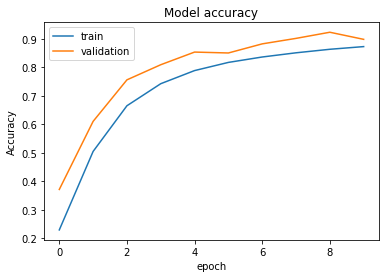

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('epoch')
plt.legend(['train','validation'],loc='upper left')
plt.show()

*we can see that our model is a best-fit*

In [ ]:
prediction=model.predict(test_data)

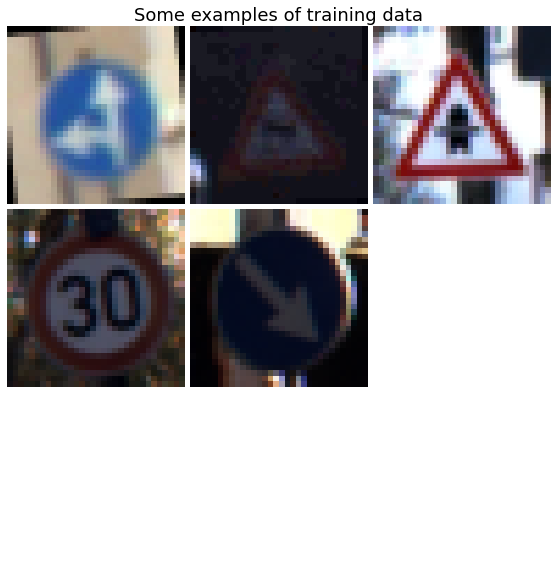

In [ ]:
%matplotlib inline
# Preparing function for ploting set of examples
# As input it will take 4D tensor and convert it to the grid
# Values will be scaled to the range [0, 255]
def convert_to_grid(x_input):
    N, H, W, C = x_input.shape
    grid_size = int(ceil(sqrt(N)))
    grid_height = H * grid_size + 1 * (grid_size - 1)
    grid_width = W * grid_size + 1 * (grid_size - 1)
    grid = np.zeros((grid_height, grid_width, C)) + 255
    next_idx = 0
    y0, y1 = 0, H
    for y in range(grid_size):
        x0, x1 = 0, W
        for x in range(grid_size):
            if next_idx < N:
                img = x_input[next_idx]
                low, high = np.min(img), np.max(img)
                grid[y0:y1, x0:x1] = 255.0 * (img - low) / (high - low)
                next_idx += 1
            x0 += W + 1
            x1 += W + 1
        y0 += H + 1
        y1 += H + 1

    return grid
examples = data['x_train'][78:83, :, :, :]

fig = plt.figure()
grid = convert_to_grid(examples)
plt.imshow(grid.astype('uint8'), cmap='gray')
plt.axis('off')
plt.gcf().set_size_inches(10, 10)
plt.title('Some examples of training data', fontsize=18)

plt.show()

# Saving the plot
fig.savefig('training_examples.png')
plt.close()

Their corresponding labels are

In [ ]:
sample = data['y_train'][78:83]
for y in sample :
    print(y, "---->", data_labels[y])

37 ----> Go straight or left
23 ----> Slippery road
11 ----> Right-of-way at the next intersection
1 ----> Speed limit (30km/h)
38 ----> Keep right


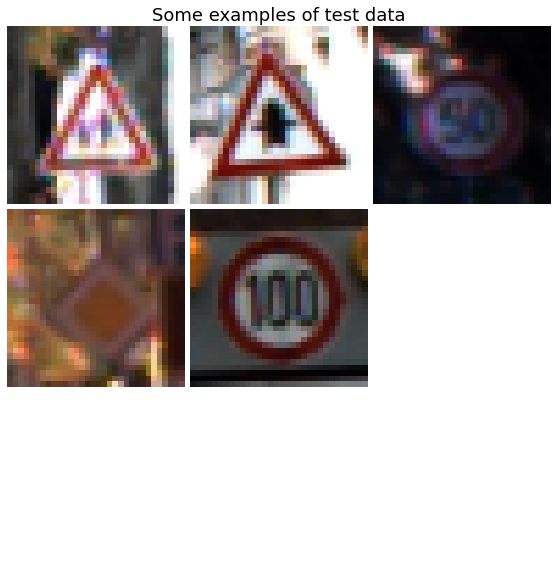

In [ ]:
examples1 = data['x_test'][50:55, :, :, :]

fig = plt.figure()
grid = convert_to_grid(examples1)
plt.imshow(grid.astype('uint8'), cmap='gray')
plt.axis('off')
plt.gcf().set_size_inches(10, 10)
plt.title('Some examples of test data', fontsize=18)

plt.show()

fig.savefig('testing_examples.png')
plt.close()

In [ ]:
sample_test = data['y_test'][50:55]
sample_prediction = prediction[50:55]
for (y, yp) in zip(sample_test, sample_prediction) :
    print("Expected ", y, "---->", data_labels[y], "===========", "Predicted ", np.argmax(yp), "---->", data_labels[np.argmax(yp)])

Expected  28 ----> Children crossing =========== Predicted  28 ----> Children crossing
Expected  11 ----> Right-of-way at the next intersection =========== Predicted  11 ----> Right-of-way at the next intersection
Expected  2 ----> Speed limit (50km/h) =========== Predicted  4 ----> Speed limit (70km/h)
Expected  12 ----> Priority road =========== Predicted  12 ----> Priority road
Expected  7 ----> Speed limit (100km/h) =========== Predicted  7 ----> Speed limit (100km/h)


In [ ]:
model.save('traffic.h5')